<a href="https://colab.research.google.com/github/vidhyagowda-232/TSF-GRIP-MAR-2023-Internship-Tasks/blob/main/Task2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation - GRIP - Data Science and Business Analytics - MAR'2023**

**TASK 2 : Prediction using unsupervised ML**

**Author : Vidhya Shree H**

**Dataset used: Iris dataset, which is available in sklearn library.**

*   Alternatively, it can be downloaded through the following link - https://bit.ly/3kXTdox






**Problem Statement :**
Predict the optimum number of clusters and represent it visually.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [ ]:
#Loading the datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(11)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
df.shape

(150, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
# Finding the optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values

K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

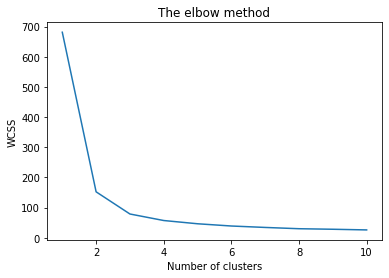

In [ ]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [ ]:
#Applying kmeans algorithm
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

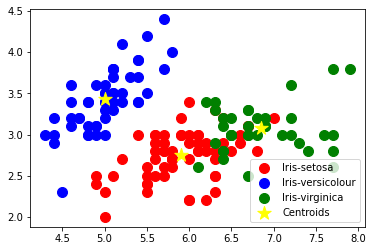

In [ ]:
#Visualising the clusters (first two columns)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

#Plotting the centriods of the cluster
clusters=kmeans.cluster_centers_
plt.scatter(clusters[:, 0], clusters[:,1], 
            s = 200, c = 'yellow', label = 'Centroids',marker='*')
plt.legend()